# Distribucion de los Datos

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

sns.set_theme('paper')

In [2]:

state_abreviations = [
    "AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "ID", 
    "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", 
    "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH", "OK", 
    "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", 
    "WI", "WY"
]

In [3]:
df_maps_restaurantes = pd.read_parquet(r'Generated\Google\metada_sitios.parquet')

In [4]:
def get_state_ab(st):
    try:
        state = st.split(', ')[-1].split(' ')[0]
        if state in state_abreviations:
            return state
        else:
            return np.nan
    except:
        return np.nan
    
df_maps_restaurantes['state_ab'] = df_maps_restaurantes['address'].apply(get_state_ab)

In [5]:
top_5 = df_maps_restaurantes['state_ab'].value_counts().head(5).index.to_list()

In [6]:
df_maps_restaurantes = df_maps_restaurantes[df_maps_restaurantes['state_ab'].isin(top_5)]

In [7]:
df_maps_restaurantes.reset_index(inplace=True)

In [8]:
df_maps_restaurantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81394 entries, 0 to 81393
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             81394 non-null  int64  
 1   name              81394 non-null  object 
 2   address           81394 non-null  object 
 3   gmap_id           81394 non-null  object 
 4   description       25569 non-null  object 
 5   latitude          81394 non-null  float64
 6   longitude         81394 non-null  float64
 7   category          81394 non-null  object 
 8   avg_rating        81394 non-null  float64
 9   num_of_reviews    81394 non-null  int64  
 10  price             36360 non-null  object 
 11  hours             72996 non-null  object 
 12  MISC              80921 non-null  object 
 13  state             73245 non-null  object 
 14  relative_results  64236 non-null  object 
 15  url               81394 non-null  object 
 16  state_ab          81394 non-null  object

In [9]:
conteo_restaurantes = df_maps_restaurantes.name.value_counts()

C:\Users\javier\AppData\Local\Temp\ipykernel_14180\1069355176.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha="right",rotation_mode='anchor')


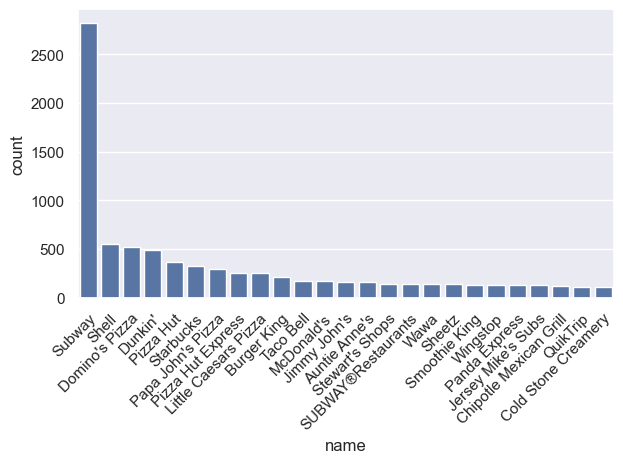

In [10]:
ax = sns.barplot(conteo_restaurantes.head(25))
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha="right",rotation_mode='anchor')
plt.tight_layout()
plt.show()

In [11]:
df_maps_restaurantes.address.apply(lambda s: s.split(",")[0]).value_counts()

address
Subway              2824
Shell                552
Domino's Pizza       520
Dunkin'              487
Pizza Hut            368
                    ... 
Coffee Fever           1
Sergeant York          1
Bob's Happy Hour       1
Ma Dukes               1
Steak 48               1
Name: count, Length: 62346, dtype: int64

In [12]:
df_maps_restaurantes.address.apply(lambda s: s.split(",")[1]).value_counts().tail(15)

address
6271 St Augustine Rd      1
96-27 Linden Blvd         1
1228 Seawall Blvd         1
2323 Alameda Ave          1
25-20 Beach Channel Dr    1
549                       1
116 N Washington Ave      1
230 Cypress Ave           1
2123 N Bellflower Blvd    1
347 Don Shula Dr          1
46577 Mission Blvd        1
2018 Crockett Rd          1
12444 U.S. Hwy 190        1
700 S Florida Ave         1
260 S Broad St            1
Name: count, dtype: int64

In [13]:
def split3(s):
    try:
        return s.split(",")[2]
    except:
        return np.nan
    return np.nan
    

In [14]:
df_maps_restaurantes.address.apply(split3).value_counts()

address
New York          3126
Houston           2398
Brooklyn          2300
Los Angeles       2165
Philadelphia      1559
                  ... 
3111 S 31st St       1
2640 NY-3            1
FL 33544             1
Sorrento Ave         1
4825 SW 8th St       1
Name: count, Length: 7317, dtype: int64

In [15]:
df_maps_restaurantes.address.apply(lambda s: len(s.split(","))).value_counts()

address
4    77703
5     2387
3     1031
6      235
7       31
8        6
9        1
Name: count, dtype: int64

In [16]:
def split4(s):
    try:
        return s.split(",")[3]
    except:
        return np.nan
    return np.nan
    


In [17]:
df_maps_restaurantes.address.apply(split4).value_counts()

address
NY 10003           240
NY 10002           211
FL 33139           194
NY 10013           155
NY 11211           153
                  ... 
PA 15014             1
728 Highway 28       1
Honeoye              1
North Tonawanda      1
PA 15715             1
Name: count, Length: 7161, dtype: int64

In [18]:
def split5(s,):
    try:
        return s.split(",")[4]
    except:
        return np.nan
    return np.nan
    


In [19]:
df_maps_restaurantes.address.apply(split5).value_counts()

address
Los Angeles           14
TX 75261              12
NY 10019              10
TX 77002              10
TX 77032               9
                      ..
Orangevale             1
TX 78264               1
CA 94513               1
Palm Beach Gardens     1
CA 95050               1
Name: count, Length: 1748, dtype: int64

In [20]:
df_maps_restaurantes.gmap_id.value_counts()

gmap_id
0x80c2c778e3b73d33:0xbdc58662a4a97d49    2
0x864e87618a2d03c9:0xe54361fac6dd06d7    2
0x89c260220dcc103d:0xf4bf41e03f3cb67e    2
0x8640c08b5da38fed:0x387239b688b4e058    2
0x8644d38444e3adc3:0x728c8bb7e92b7f3     2
                                        ..
0x80c2bc823a059619:0xb40f9cef68f0d789    1
0x80c2bc81932f0b33:0x54b357a64282bc71    1
0x88d905a743c48b7d:0x2e0647351506d75d    1
0x89c6a3de9bec8d71:0xb402257b009bc3a0    1
0x89c6c74f43a49b55:0x6be6995921c58b12    1
Name: count, Length: 80973, dtype: int64

In [21]:
descripciones = df_maps_restaurantes.description.dropna()
descripciones.drop_duplicates(inplace=True)

In [23]:
# %pip install wordcloud

In [43]:
descripciones_text = " ".join(descripciones.tolist()).lower()

In [44]:
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(descripciones_text)

In [46]:
cuenta_palabras = pd.DataFrame(data=[wordcloud.process_text(text)]).T.rename({0:'count'}, axis=1).sort_values(by='count',ascending=False)

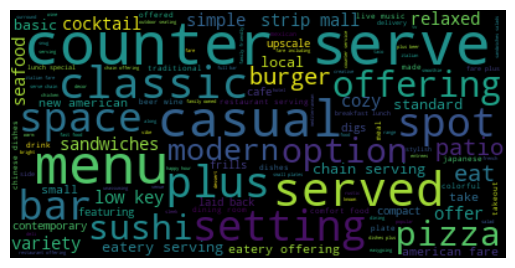

In [45]:
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

<Axes: >

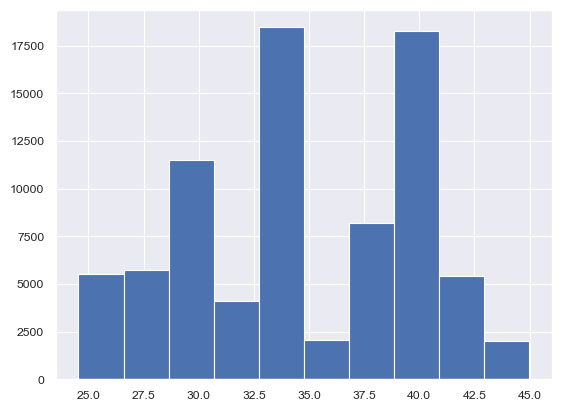

In [59]:
df_maps_restaurantes.query(['latitude'].hist()